<a href="https://colab.research.google.com/github/Smart-Lizard/Med_Image_Generation/blob/main/MedMNIST_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This notebook simply preprocesses the data from the ChestMNIST dataset and plots it.
#Also provides information on how the data is formatted + what labels are present.

In [2]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=060da27c04953cd594bf224341d6bea9e0d7a1ff949d75c22d5f90d0495871bd
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [3]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

In [4]:
data_flag = 'chestmnist'
download = True

BATCH_SIZE = 128
info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download, size=224, mmap_mode='r')

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

100%|██████████| 3889293042/3889293042 [02:32<00:00, 25515374.02it/s]


In [5]:
print(train_dataset)

Dataset ChestMNIST of size 224 (chestmnist_224)
    Number of datapoints: 78468
    Root location: /root/.medmnist
    Split: train
    Task: multi-label, binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'atelectasis', '1': 'cardiomegaly', '2': 'effusion', '3': 'infiltration', '4': 'mass', '5': 'nodule', '6': 'pneumonia', '7': 'pneumothorax', '8': 'consolidation', '9': 'edema', '10': 'emphysema', '11': 'fibrosis', '12': 'pleural', '13': 'hernia'}
    Number of samples: {'train': 78468, 'val': 11219, 'test': 22433}
    Description: The ChestMNIST is based on the NIH-ChestXray14 dataset, a dataset comprising 112,120 frontal-view X-Ray images of 30,805 unique patients with the text-mined 14 disease labels, which could be formulized as a multi-label binary-class classification task. We use the official data split, and resize the source images of 1×1024×1024 into 1×28×28.
    License: CC BY 4.0


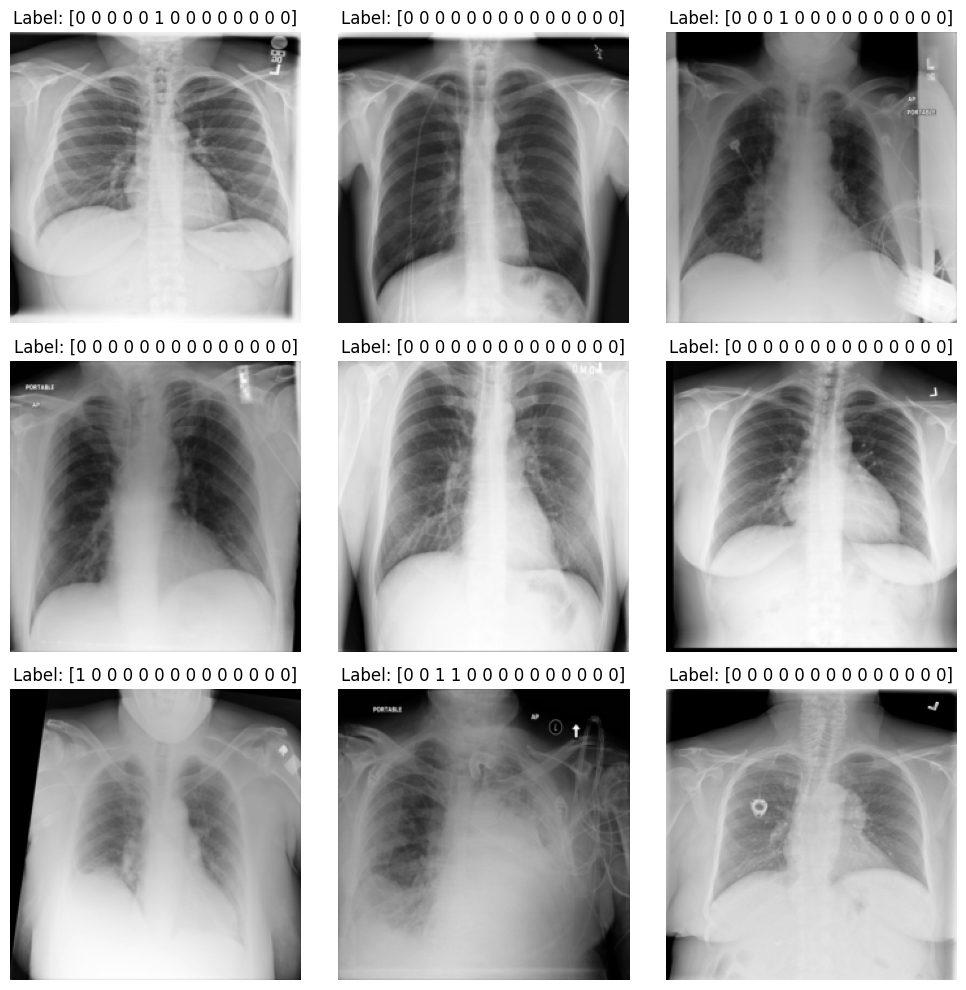

In [6]:
import matplotlib.pyplot as plt

# visualization
def plot_random_images(dataset, num_images=300):
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    axs = axs.flatten()

    for ax in axs:
        idx = np.random.randint(0, len(dataset))
        img, label = dataset[idx]
        img = img.permute(1, 2, 0).numpy().squeeze()
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_random_images(train_dataset)